# Runge Kutta Method

Write about Taylor series.
In the context of the numerical solution of ordinary or partial diffential equations, the second more significant approximation comes from that the computer resources are limited. From the physical point of view, both time and space are continuous variables, but continuous data does not exist in the numerical world, as it would require infinite computer memory. Therefore, continuous variables are approximated using a discrete representation. For that purpose, we can for example introduce grid points at which the functions are evaluated. A small grid spacing results in a higher accuracy, but it comes at a higher computational cost. Some balance always has to be found.

\begin{equation} y(t + h)\approx y(t)+y'(t)h+\frac{y''(t)}{2!}h^2+\dots + \frac{y^{(k)}(t)}{k!}h^k  + \mathcal{O}(h^{k+1})\end{equation}
is of the order $k+1. Importantly, this implies that the remainder is atleast reduced by a factor of $2^{K+1}$ if $h$ is divided by 2. 


Begin with the Euler Methods and its drawback. - Derive the Euler method.
Taking the above taylor series, we can neglect the 2nd order derviates and higher to get Forward Euler Method- also known as Explicit Euler, as the next iteration solely depends on previous one.

\begin{equation} y(t + dt) = y(t) + h.y'(t) \end{equation} 
where h is the distance between grid points.

Alternatively, in terms of numerical approximation, Forward Euler can be written as

\begin{equation} y_{i+1} = y_i + h.f(t_i, y_i) \end{equation} 
where, $y_i$ is the approximation of the function at $t_i$ and $h$ is the grid distance kept constant.

Similarly, there exists Backwards Euler or Implicit Euler Method given as:

\begin{equation} y_{i+1} = y_i + hf(t_{i+1}, y_{i+1}) \end{equation}

The advantage of implicit schemes over explicit ones is that usually they allow a larger time step to be stable. They are then useful when dealing with a stiff problem. The problem is called stiff if its solution varies rapidly in time, so that certain numerical schemes require an extremely small time step for stability.

Both forward and backward Euler is of the consistency of order 1, i.e $\mathcal{O(h^1)}$

We will now look at the difference between these two methods by taking a simple radioactive decay example:
The one-step advancement is given by:
\begin{equation} y_{i+1} = (1+\alpha h)^{-1}y_i \end{equation}


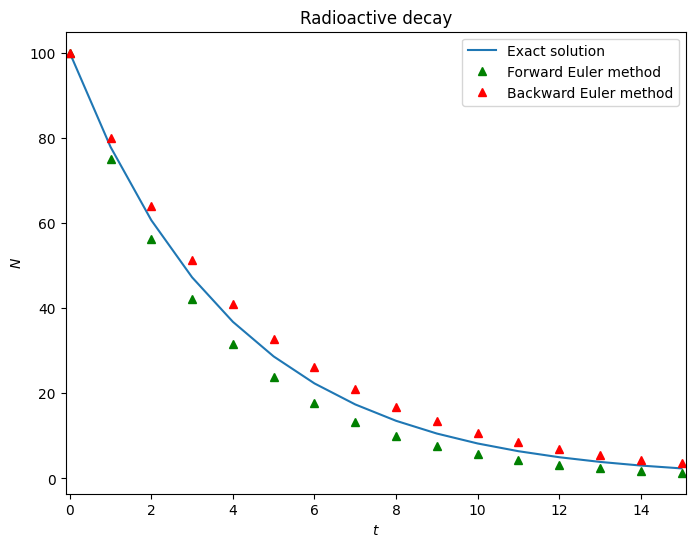

In [24]:
alpha = 0.25 # Exponential law coeffecient
ti = 0.0     # Initial time
tf = 15.0    # Final time
dt = 1.      # Time step
Ni = 100     # Initial condition
import numpy as np
import matplotlib.pyplot as plt
nt = int((tf-ti)/dt)

# Let us also redefine the array storing N, so that it contains
# both the solution predicted by the
# implicit and explicit schemes in two columns.
N = np.empty((nt+1, 2))

# We copy initial condition into both columns.
N[0] = Ni, Ni

# Define one-time step advancement coefficient
# assumed by the implicit Euler outside of the
# loop, as it is independant of t.
# If some computation is independant of the iteration index,
# try to ALWAYS take it out of the loop. Otherwise,
# you are performing useless repetitive computations,
# and simply waste time.
coef_imp = (1.+alpha*dt)**(-1)

# Advance solution both with the implicit and
# explicit schemes.
for i in range(nt):
    N[i+1, 0] = N[i, 0] - alpha*N[i, 0]*dt

    N[i+1, 1] = coef_imp*N[i, 1]


# t and Nexact have to be recomputed, as we
# have a newly defined tf.
t = np.arange(nt+1) * dt

Nexact = Ni * np.exp(-alpha*t)

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(t, Nexact, label='Exact solution')

ax.plot(t, N[:, 0], '^', color='green', label='Forward Euler method')
ax.plot(t, N[:, 1], '^', color=(1., 0., 0.), label='Backward Euler method')

ax.set_xlim(t[0]-0.1, t[-1]+0.1)

# We set labels for the axes and title of a subplot.
ax.set_xlabel('$t$')
ax.set_ylabel('$N$')
ax.set_title('Radioactive decay')

# Make the legend visible.
ax.legend()

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

# Fixed parameters
alpha = 0.25    # Exponential decay coefficient
ti = 0.0        # Initial time
tf = 15.0       # Final time
Ni = 100        # Initial condition

def solve_decay(dt):
    nt = int((tf - ti) / dt)
    t = np.arange(nt + 1) * dt
    N = np.empty((nt + 1, 2))
    N[0] = Ni, Ni
    coef_imp = (1. + alpha * dt) ** (-1)

    for i in range(nt):
        # Forward Euler
        N[i+1, 0] = N[i, 0] - alpha * N[i, 0] * dt
        # Backward Euler
        N[i+1, 1] = coef_imp * N[i, 1]

    # Exact solution
    Nexact = Ni * np.exp(-alpha * t)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(t, Nexact, label='Exact solution', linewidth=2)
    plt.plot(t, N[:, 0], '^--', color='green', label='Forward Euler')
    plt.plot(t, N[:, 1], 'o--', color='red', label='Backward Euler')

    plt.xlabel('Time $t$')
    plt.ylabel('$N$')
    plt.title(f'Radioactive Decay ($\\Delta t = {dt}$)')
    plt.grid(True)
    plt.legend()
    plt.xlim(t[0], tf)
    plt.ylim(0, Ni + 10)
    plt.show()

# Create an interactive slider
interact(solve_decay, dt=FloatSlider(value=1.0, min=0.1, max=3.0, step=0.1, description='Δt'))


interactive(children=(FloatSlider(value=1.0, description='Δt', max=3.0, min=0.1), Output()), _dom_classes=('wi…

<function __main__.solve_decay(dt)>

Here we observe some interesting things. The solutions predicted by the explicit and implicit Euler schemes differ noticably. Even though they are both of the same order of accuracy, they are obviously not identical and the implicit Euler scheme matches the exact solution a bit better. Also, for the chosen time step, both methods are stable in this case. As the backward Euler uses the next value implicitly (using non-linear solver - see Banach fixed point iteration scheme), hence its more stable, i.e it does not blow up as compared to explicit scheme.

Now we will compare implicit and explicit Euler where the system becomes unstable and this is where our Runge-Kutta integrators comes into play.
Let's consider another two dimensional example and analyze the motion of an object attached to a spring. The equation of motion reads:

\begin{equation} m\frac{d^2 x}{d t^2}=-kx \end{equation}


where $x$ is the position of the object with respect to its equilibrium position and $k>0$ is the spring constant.
\begin{align} & \frac{dx}{dt}=v,\ & \frac{dv}{dt}=-\gamma^2 x, \end{align} 
with $\gamma = \sqrt{k/m}$ 

For the forward Euler scheme we have:



\begin{align}
\begin{pmatrix}
x^{n+1} \\
v^{n+1}
\end{pmatrix}
=
\begin{pmatrix}
x^{n} \\
v^{n}
\end{pmatrix}
+
dt \cdot
\begin{pmatrix}
0 & 1 \\
-\gamma^2 & 0
\end{pmatrix}
\begin{pmatrix}
x^{n} \\
v^{n}
\end{pmatrix}
\end{align}

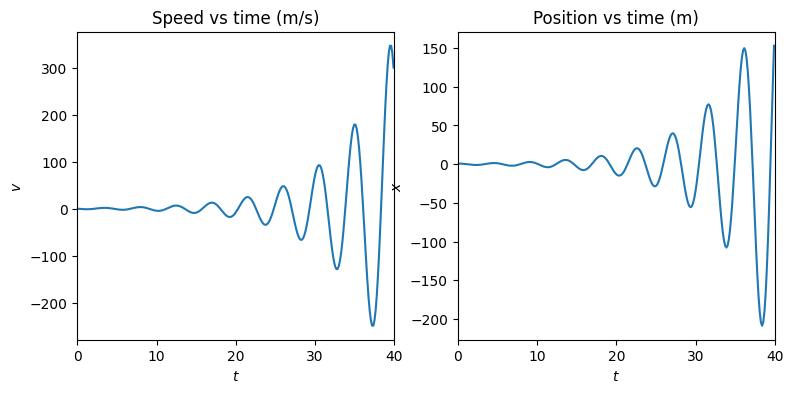

In [26]:
k = 2.    # spring constant
m = 1.    # object's mass
x0 = 0.75 # initial position
v0 = 0.   # initial velocity
ti = 0.   # initial time
tf = 40.0 # final time at which the solution is computed
dt = 0.15 # time step

# Let's first compute gamma and the number
# of time steps.
gamma = np.sqrt(k/m)
nt = int((tf-ti)/dt)

# Create a numpy array containing the
# intermediate values of y, including
# those at ti and tf.
y = np.empty((nt+1, 2))

# Store initial condition in the first row
# of y.
y[0] = x0, v0

# Create matrix L.
L = np.array([[0., 1.], [-gamma**2, 0.]])

# Perform the time stepping.
for i in range(nt):
    y[i+1] = y[i] + np.dot(L, y[i])*dt


# Store nt time steps.
t = np.arange(nt+1) * dt

fig, ax = plt.subplots(1, 2, figsize=(9, 4))

ax[0].plot(t, y[:, 1])

ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$v$')
ax[0].set_title('Speed vs time (m/s)')

ax[1].plot(t, y[:, 0])

ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$x$')
ax[1].set_title('Position vs time (m)')

# Here we take advantage of that we
# store both axes objects in one vari-
# ables - we don't have to restrict the
# limits for each of them separately,
# as we can iterate over the members
# of the sequence - makes the code shorter.
for axis in ax:
    axis.set_xlim(0, 40.)

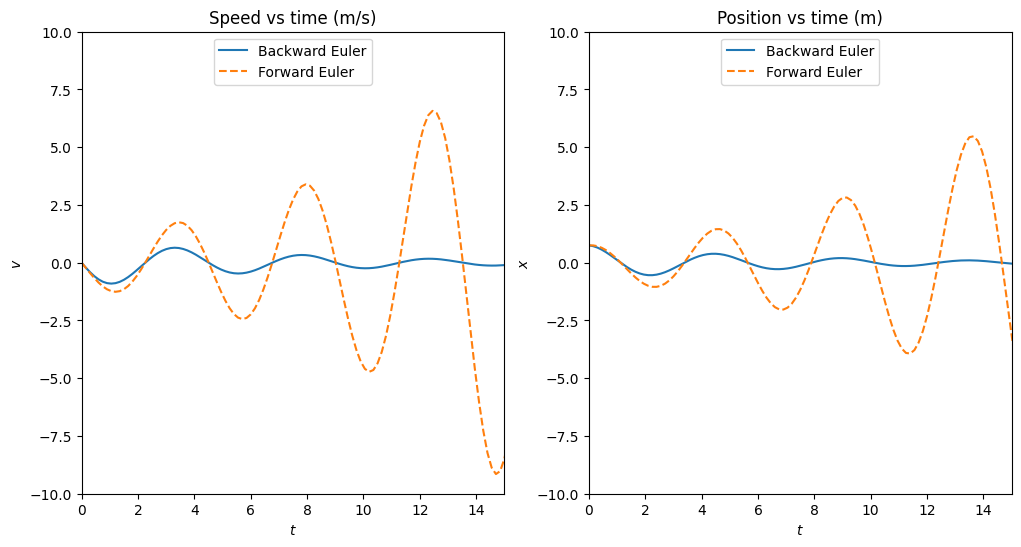

In [27]:
# We have to redefine time parameters
# again, as they got overwritten.
ti = 0.    # initial time
tf = 40.0  # final time at which the solution is computed
dt = 0.15  # time step

# Recompute the number of time steps and
# the time array.
nt = int((tf-ti)/dt)

t = np.arange(nt+1) * dt

y_imp = np.empty((nt+1, 2))

# Store initial condition in the first row
# of y.
y_imp[0] = x0, v0

# As the matrix that advances the solution
# does not depend on t, we compute it
# right away.
# To do this, we use the linalg.inv function of numpy.
#
# For more info
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html
L_imp = np.linalg.inv(np.array([[1., -dt], [gamma**2*dt, 1.]]))

# Perform the time stepping. dt is hidden
# in L_imp, so it does appear here.
for i in range(nt):
    y_imp[i+1] = np.dot(L_imp, y_imp[i])



fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(t, y_imp[:, 1], label='Backward Euler')
ax[0].plot(t, y[:, 1], '--', label='Forward Euler')

ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$v$')
ax[0].set_title('Speed vs time (m/s)')

ax[1].plot(t, y_imp[:, 0], label='Backward Euler')
ax[1].plot(t, y[:, 0], '--', label='Forward Euler')

ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$x$')
ax[1].set_title('Position vs time (m)')

for axis in ax:
    axis.set_xlim(0, 15)
    axis.set_ylim(-10, 10)
    axis.legend(loc='upper center')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# System parameters
k = 2.     # spring constant
m = 1.     # mass
x0 = 0.75  # initial position
v0 = 0.0   # initial velocity
ti = 0.    # start time
tf = 40.0  # end time
gamma = np.sqrt(k/m)  # angular frequency


def exact_solution(t):
    """Compute the exact position and velocity for harmonic oscillator."""
    x_exact = x0 * np.cos(gamma * t) + (v0 / gamma) * np.sin(gamma * t)
    v_exact = -x0 * gamma * np.sin(gamma * t) + v0 * np.cos(gamma * t)
    return x_exact, v_exact


def simulate(dt):
    nt = int((tf - ti) / dt)
    t = np.linspace(ti, tf, nt + 1)
    t_exact = np.linspace(0,20,100)

    # Exact
    x_exact, v_exact = exact_solution(t_exact)

    # Forward Euler (Explicit)
    y_fwd = np.empty((nt + 1, 2))
    y_fwd[0] = x0, v0
    L_fwd = np.array([[0., 1.], [-gamma**2, 0.]])
    for i in range(nt):
        y_fwd[i+1] = y_fwd[i] + np.dot(L_fwd, y_fwd[i]) * dt

    # Backward Euler (Implicit)
    y_bwd = np.empty((nt + 1, 2))
    y_bwd[0] = x0, v0
    L_bwd = np.linalg.inv(np.array([[1., -dt], [gamma**2 * dt, 1.]]))
    for i in range(nt):
        y_bwd[i+1] = np.dot(L_bwd, y_bwd[i])

    # Plotting
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    # Velocity
    ax[0].plot(t_exact, v_exact, label='Exact', color='black')
    ax[0].plot(t, y_fwd[:, 1], '--', label='Forward Euler', color='green')
    ax[0].plot(t, y_bwd[:, 1], ':', label='Backward Euler', color='red')
    ax[0].set_title("Velocity vs Time")
    ax[0].set_xlabel("$t$")
    ax[0].set_ylabel("$v(t)$")
    ax[0].legend()
    ax[0].grid(True)

    # Position
    ax[1].plot(t_exact, x_exact, label='Exact', color='black')
    ax[1].plot(t, y_fwd[:, 0], '--', label='Forward Euler', color='green')
    ax[1].plot(t, y_bwd[:, 0], ':', label='Backward Euler', color='red')
    ax[1].set_title("Position vs Time")
    ax[1].set_xlabel("$t$")
    ax[1].set_ylabel("$x(t)$")
    ax[1].legend()
    ax[1].grid(True)

    for axis in ax:
        axis.set_xlim(0, min(tf, 20))
        axis.set_ylim(-2, 2)

    plt.tight_layout()
    plt.show()


# Interactive widget
interact(simulate, dt=FloatSlider(value=0.15, min=0.01, max=1.0, step=0.01, description='Δt'));


interactive(children=(FloatSlider(value=0.15, description='Δt', max=1.0, min=0.01, step=0.01), Output()), _dom…

One can clearly see, that the timesteps needs to be as small as possible. Yet, when the time domain is large, even the approximation diverges more from the exact solution. Hence we will now look at some more efficient time advancement schemes which have both better accuracy and larger domains of stability. They are known as Runge Kutta schemes.

We will particularly look at Runge-Kutta 4th Order scheme.

Consider our taylor series again where this time the function is being approximated upto the 4th order: 

\begin{equation} y(t + h)\approx y(t)+y'(t)h+\frac{y''(t)}{2!}h^2 + \frac{y'''(t)}{3!}h^3 + \frac{y''''(t)}{4!}h^4 + \mathcal{O}(h^{5})\end{equation}

The basic idea is, instead of looking for higher order derivatives, we will substitute them with slopes and hence in numerical representation, the above equation will look as follows:

\begin{equation} y_{i+1} = y_i + h.(a_1k_1 + a_2k_2 + a_3k_3 + a_4k_4) \end{equation} 
where $a_i$ are weights/coefficients and $k_i$ are slopes.
Mathematically, 
$\sum_i a_i = 1$
and slopes are defined as:

\begin{align*}
k_1 &= f(t_n, y_n) \\
k_2 &= f\left(t_n + \frac{h}{2},\, y_n + \frac{h}{2}k_1\right) \\
k_3 &= f\left(t_n + \frac{h}{2},\, y_n + \frac{h}{2}k_2\right) \\
k_4 &= f\left(t_n + h,\, y_n + hk_3\right) \\
y_{n+1} &= y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{align*}

Intuitively, one can think, one slope is built on the previous one and for the next step, we need to take the average of the slopes.
The coefficients can be found by looking at Butcher Tableau as shown below. This process is part of what’s called Butcher’s theory — it involves matching Taylor series expansions to determine the coefficients such that the method achieves a desired order of accuracy.

\begin{array}{c|cccc}
0   &       &       &       &      \\
\frac{1}{2} & \frac{1}{2} &       &       &      \\
\frac{1}{2} & 0     & \frac{1}{2} &       &      \\
1   & 0     & 0     & 1     &      \\
\hline
    & \frac{1}{6} & \frac{1}{3} & \frac{1}{3} & \frac{1}{6}
\end{array}





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# System parameters
k = 2.     # spring constant
m = 1.     # mass
x0 = 0.75  # initial position
v0 = 0.0   # initial velocity
ti = 0.    # start time
tf = 40.0  # end time
gamma = np.sqrt(k/m)  # angular frequency


def exact_solution(t):
    """Compute the exact position and velocity for harmonic oscillator."""
    x_exact = x0 * np.cos(gamma * t) + (v0 / gamma) * np.sin(gamma * t)
    v_exact = -x0 * gamma * np.sin(gamma * t) + v0 * np.cos(gamma * t)
    return x_exact, v_exact


def rk4_step(y, dt):
    """Perform one RK4 step for the system y' = L y."""
    L = np.array([[0., 1.], [-gamma**2, 0.]])
    
    k1 = np.dot(L, y)
    k2 = np.dot(L, y + 0.5 * dt * k1)
    k3 = np.dot(L, y + 0.5 * dt * k2)
    k4 = np.dot(L, y + dt * k3)
    
    return y + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)


def simulate(dt):
    nt = int((tf - ti) / dt)
    t = np.linspace(ti, tf, nt + 1)
    t_exact = np.linspace(0, 20, 100)

    # Exact solution
    x_exact, v_exact = exact_solution(t_exact)

    # Forward Euler (Explicit)
    y_fwd = np.empty((nt + 1, 2))
    y_fwd[0] = x0, v0
    L_fwd = np.array([[0., 1.], [-gamma**2, 0.]])
    for i in range(nt):
        y_fwd[i+1] = y_fwd[i] + np.dot(L_fwd, y_fwd[i]) * dt

    # Backward Euler (Implicit)
    y_bwd = np.empty((nt + 1, 2))
    y_bwd[0] = x0, v0
    L_bwd = np.linalg.inv(np.array([[1., -dt], [gamma**2 * dt, 1.]]))
    for i in range(nt):
        y_bwd[i+1] = np.dot(L_bwd, y_bwd[i])

    # RK4 Method
    y_rk4 = np.empty((nt + 1, 2))
    y_rk4[0] = x0, v0
    for i in range(nt):
        y_rk4[i+1] = rk4_step(y_rk4[i], dt)

    # Plotting
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    # Velocity plot
    ax[0].plot(t_exact, v_exact, label='Exact', color='black')
    ax[0].plot(t, y_fwd[:, 1], '--', label='Forward Euler', color='green')
    ax[0].plot(t, y_bwd[:, 1], ':', label='Backward Euler', color='red')
    ax[0].plot(t, y_rk4[:, 1], '-.', label='RK4', color='blue')
    ax[0].set_title("Velocity vs Time")
    ax[0].set_xlabel("$t$")
    ax[0].set_ylabel("$v(t)$")
    ax[0].legend()
    ax[0].grid(True)

    # Position plot
    ax[1].plot(t_exact, x_exact, label='Exact', color='black')
    ax[1].plot(t, y_fwd[:, 0], '--', label='Forward Euler', color='green')
    ax[1].plot(t, y_bwd[:, 0], ':', label='Backward Euler', color='red')
    ax[1].plot(t, y_rk4[:, 0], '-.', label='RK4', color='blue')
    ax[1].set_title("Position vs Time")
    ax[1].set_xlabel("$t$")
    ax[1].set_ylabel("$x(t)$")
    ax[1].legend()
    ax[1].grid(True)

    for axis in ax:
        axis.set_xlim(0, min(tf, 20))
        axis.set_ylim(-2, 2)

    plt.tight_layout()
    plt.show()
import importlib.metadata
def list_requirements():
    libraries = ["numpy", "matplotlib", "scikit-learn", "ipywidgets"]
    for lib in libraries:
        version = importlib.metadata.version(lib)
        print(f"{lib}=={version}")

#list_requirements()
# Interactive widget
interact(simulate, dt=FloatSlider(value=0.15, min=0.01, max=1.0, step=0.01, description='Δt'));


numpy==2.2.5
matplotlib==3.10.1
scikit-learn==1.6.1
ipywidgets==8.1.7


interactive(children=(FloatSlider(value=0.15, description='Δt', max=1.0, min=0.01, step=0.01), Output()), _dom…

Can you see the difference? The accuracy of the RK4 method is $\mathcal{O}(h^4)$, meaning if you reduced the step size from $h = 0.1$ to $h= 10^{-2}$, the accuracy jumps from $10^{-4}$  to $10^{-8}$!!

Further reading can be seen why higher order RK methods are not applied - there are certain trade-offs that makes their usage trivial. Although there are libraries in Matlab and Python which uses modified RK methods of higher order too!

We will particularly look at the Runge-Kutta 4th Order scheme.

Consider our Taylor series again where this time the function is approximated up to the 4th order:

$$
y(t + h) \approx y(t) + y'(t) h + \frac{y''(t)}{2!} h^2 + \frac{y'''(t)}{3!} h^3 + \frac{y''''(t)}{4!} h^4 + \mathcal{O}(h^{5})
$$

The basic idea is, instead of looking for higher order derivatives, we will substitute them with slopes and hence in numerical representation, the above equation will look as follows:

$$
y_{i+1} = y_i + h \cdot (a_1 k_1 + a_2 k_2 + a_3 k_3 + a_4 k_4)
$$

where $a_i$ are weights/coefficients and $k_i$ are slopes.  
Mathematically, 

$$
\sum_i a_i = 1
$$

and slopes are defined as:

\begin{align*}
k_1 &= f(t_n, y_n) \\
k_2 &= f\left(t_n + \frac{h}{2},\, y_n + \frac{h}{2} k_1 \right) \\
k_3 &= f\left(t_n + \frac{h}{2},\, y_n + \frac{h}{2} k_2 \right) \\
k_4 &= f\left(t_n + h,\, y_n + h k_3 \right) \\
y_{n+1} &= y_n + \frac{h}{6} (k_1 + 2 k_2 + 2 k_3 + k_4)
\end{align*}

Intuitively, one can think one slope is built on the previous one, and for the next step, we need to take the average of the slopes.

The coefficients can be found by looking at the Butcher Tableau as shown below. This process is part of what’s called Butcher’s theory — it involves matching Taylor series expansions to determine the coefficients such that the method achieves a desired order of accuracy.

$$
\begin{array}{c|cccc}
0 & & & & \\
\frac{1}{2} & \frac{1}{2} & & & \\
\frac{1}{2} & 0 & \frac{1}{2} & & \\
1 & 0 & 0 & 1 & \\
\hline
& \frac{1}{6} & \frac{1}{3} & \frac{1}{3} & \frac{1}{6}
\end{array}
$$
